<a href="https://colab.research.google.com/github/Andresitooom/repositorioa-final-analisi/blob/main/Proyecto_analisis_latinoamrica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis de las tendencias de emisiones de CO2 por sector en Latinomamerica antes y despues de implementar políticas de mitigación entre el 2000 y 2023.**

El enfoque estará en:

- Identificar los países más emisores.
- Observar cambios a lo largo del tiempo.
- Comparar niveles de emisiones antes y después de políticas climáticas clave.
- Producir visualizaciones que faciliten la comprensión de estos datos.

# **Instalar e Importar librerias**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as pd
import seaborn as sns


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Lectura datasets**

In [13]:
import pandas as pd
# Emisiones anuales por paises
df_paises = pd.read_csv("/content/drive/MyDrive/annual-co2-emissions-per-country.csv")
# Emisiones por sector
df_sector = pd.read_csv("/content/drive/MyDrive/co-emissions-by-sector.csv")


# **Limpieza de datos**

In [14]:
# Filtrar para quedarnos nuevos dataframes solo con datos desde el año 200
df_paises = df_paises[df_paises["Year"] >= 2000]
df_sector = df_sector[df_sector["Year"] >= 2000]
# Verificación
print("Años en df_paises:", df_paises["Year"].min(), "-", df_paises['Year'].max())
print("Años en df_sector:", df_sector["Year"].min(), "-", df_sector['Year'].max())

Años en df_paises: 2000 - 2023
Años en df_sector: 2000 - 2021


# **Análisis Exploratorio de datos**

In [15]:
df_paises.info()
paises_unicos_paises_lista = df_paises['Entity'].unique().tolist()
print(f"Países únicos en df_paises (lista): {paises_unicos_paises_lista}")
print(f"Total de países únicos en df_paises: {len(paises_unicos_paises_lista)}")
df_paises.head()

<class 'pandas.core.frame.DataFrame'>
Index: 5928 entries, 51 to 29136
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                5928 non-null   object 
 1   Code                  5208 non-null   object 
 2   Year                  5928 non-null   int64  
 3   Annual CO₂ emissions  5928 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 231.6+ KB
Países únicos en df_paises (lista): ['Afghanistan', 'Africa', 'Africa (GCP)', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia', 'Asia (GCP)', 'Asia (excl. China and India)', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'B

,Entity,Code,Year,Annual CO₂ emissions
51,Afghanistan,AFG,2000,1047127.94
52,Afghanistan,AFG,2001,1069098.00
53,Afghanistan,AFG,2002,1340995.00
54,Afghanistan,AFG,2003,1559602.00
55,Afghanistan,AFG,2004,1237247.00


In [16]:
df_sector.info()
paises_unicos_sector_lista = df_sector['Entity'].unique().tolist()
print(f"Países únicos en df_sector (lista): {paises_unicos_sector_lista}")
print(f"Total de países únicos en df_sector: {len(paises_unicos_sector_lista)}")
df_sector.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4510 entries, 10 to 6559
Data columns (total 12 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Entity                                                        4510 non-null   object 
 1   Code                                                          4268 non-null   object 
 2   Year                                                          4510 non-null   int64  
 3   Carbon dioxide emissions from buildings                       4449 non-null   float64
 4   Carbon dioxide emissions from industry                        4391 non-null   float64
 5   Carbon dioxide emissions from land use change and forestry    4510 non-null   float64
 6   Carbon dioxide emissions from other fuel combustion           4449 non-null   float64
 7   Carbon dioxide emissions from transport                       4449 non-nu

,Entity,Code,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels
10,Afghanistan,AFG,2000,160000.0,10000.0,-2390000.0,0.0,510000.0,230000.0,NaN,160000.00,20000.0
11,Afghanistan,AFG,2001,170000.0,10000.0,120000.0,0.0,510000.0,230000.0,NaN,180000.00,20000.0
12,Afghanistan,AFG,2002,170000.0,10000.0,120000.0,0.0,510000.0,560000.0,NaN,150000.00,20000.0
13,Afghanistan,AFG,2003,180000.0,10000.0,120000.0,0.0,720000.0,490000.0,NaN,259999.98,30000.0
14,Afghanistan,AFG,2004,200000.0,10000.0,120000.0,0.0,600000.0,240000.0,NaN,230000.00,30000.0


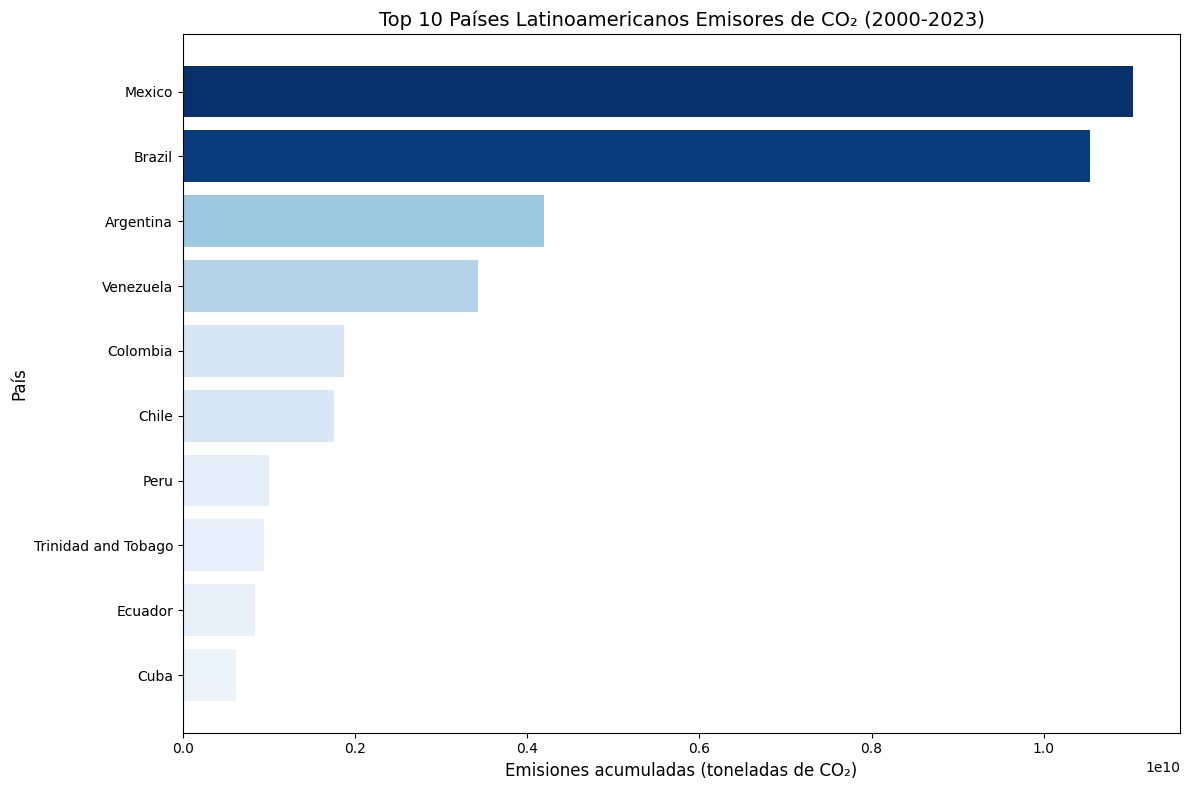

In [17]:
# Gráfico de barras top 10 países latinoamericanos Emisores de CO2
paises_latinoamericanos = [
    "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Costa Rica",
    "Cuba", "Dominican Republic", "Ecuador", "El Salvador", "Guatemala",
    "Haiti", "Honduras", "Mexico", "Nicaragua", "Panama", "Paraguay",
    "Peru", "Puerto Rico", "Uruguay", "Venezuela", "Trinidad and Tobago"
]

df_latinoamerica = df_paises[df_paises['Entity'].isin(paises_latinoamericanos)].copy()

emisiones_totales_la = df_latinoamerica.groupby('Entity')['Annual CO₂ emissions'].sum().sort_values(ascending=False)

top_10_la = emisiones_totales_la.head(10)

plt.figure(figsize=(12, 8))
plt.barh(top_10_la.index, top_10_la.values, color=plt.cm.Blues(top_10_la.values / top_10_la.max())) # Usamos un mapa de colores para la estética
plt.xlabel("Emisiones acumuladas (toneladas de CO₂)", fontsize=12)
plt.ylabel("País", fontsize=12)
plt.title("Top 10 Países Latinoamericanos Emisores de CO₂ (2000-2023)", fontsize=14)
plt.gca().invert_yaxis() # Para que el país con mayor emisión esté en la parte superior
plt.tight_layout()
plt.show()

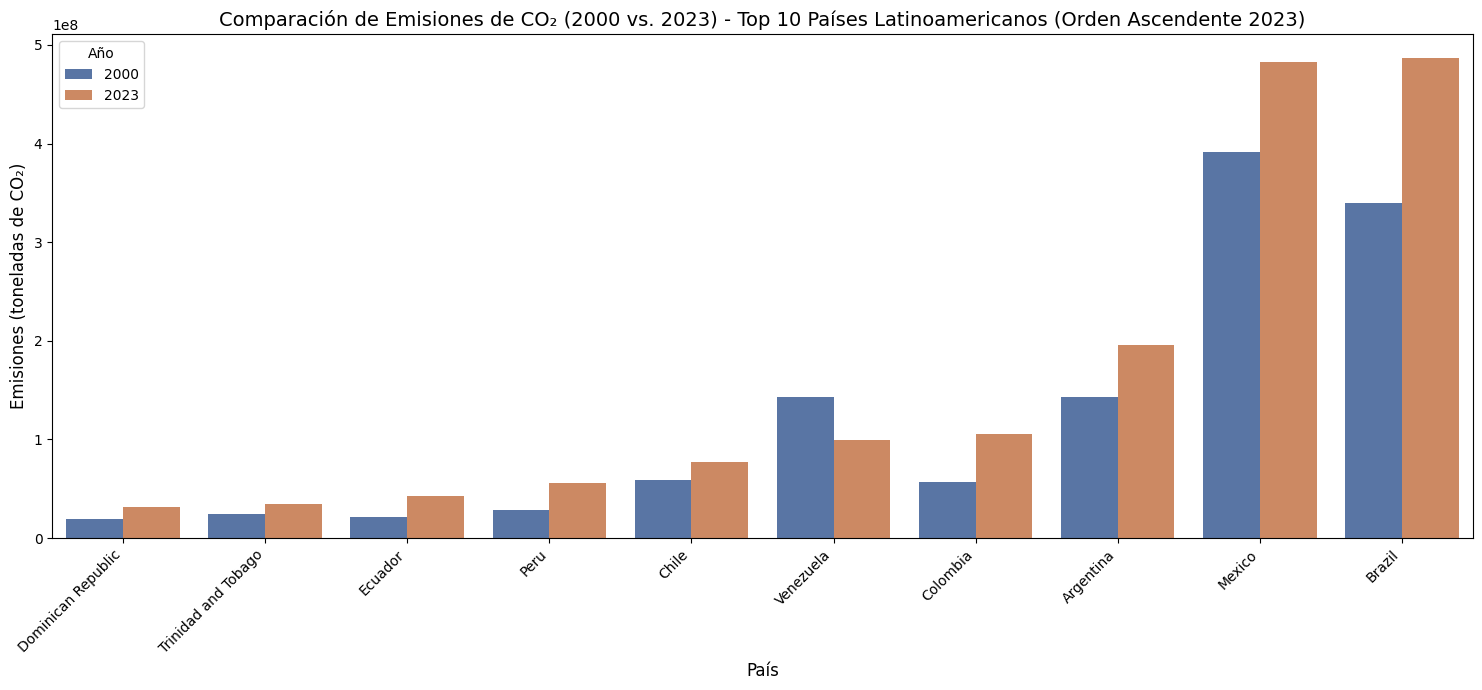

In [18]:
df_comparativa = df_paises[df_paises['Year'].isin([2000, 2023])].copy()

paises_latinoamericanos = [
    "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Costa Rica",
    "Cuba", "Dominican Republic", "Ecuador", "El Salvador", "Guatemala",
    "Haiti", "Honduras", "Mexico", "Nicaragua", "Panama", "Paraguay",
    "Peru", "Puerto Rico", "Uruguay", "Venezuela", "Trinidad and Tobago"
]

df_la_2023 = df_comparativa[(df_comparativa['Year'] == 2023) & (df_comparativa['Entity'].isin(paises_latinoamericanos))].copy()

# Calcular las emisiones de 2023 y obtener el Top 10 (orden descendente para seleccionar los mayores)
emisiones_2023_la = df_la_2023.groupby('Entity')['Annual CO₂ emissions'].sum().sort_values(ascending=False)
top_10_paises_la = emisiones_2023_la.head(10).index.tolist()

df_top_10_comparativa = df_comparativa[df_comparativa['Entity'].isin(top_10_paises_la)].copy()

# **Ordenar el DataFrame para graficar en orden ascendente según las emisiones de 2023**
df_top_10_comparativa_2023 = df_top_10_comparativa[df_top_10_comparativa['Year'] == 2023].set_index('Entity')['Annual CO₂ emissions']
df_top_10_comparativa['order'] = df_top_10_comparativa['Entity'].map(df_top_10_comparativa_2023)
df_top_10_comparativa = df_top_10_comparativa.sort_values(by='order').reset_index(drop=True)

plt.figure(figsize=(15, 7))
sns.barplot(data=df_top_10_comparativa, x='Entity', y='Annual CO₂ emissions', hue='Year', palette=['#4c72b0', '#dd8452']) # Puedes elegir otros colores contrastantes
plt.xlabel("País", fontsize=12)
plt.ylabel("Emisiones (toneladas de CO₂)", fontsize=12)
plt.title("Comparación de Emisiones de CO₂ (2000 vs. 2023) - Top 10 Países Latinoamericanos (Orden Ascendente 2023)", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Año')
plt.tight_layout()
plt.show()

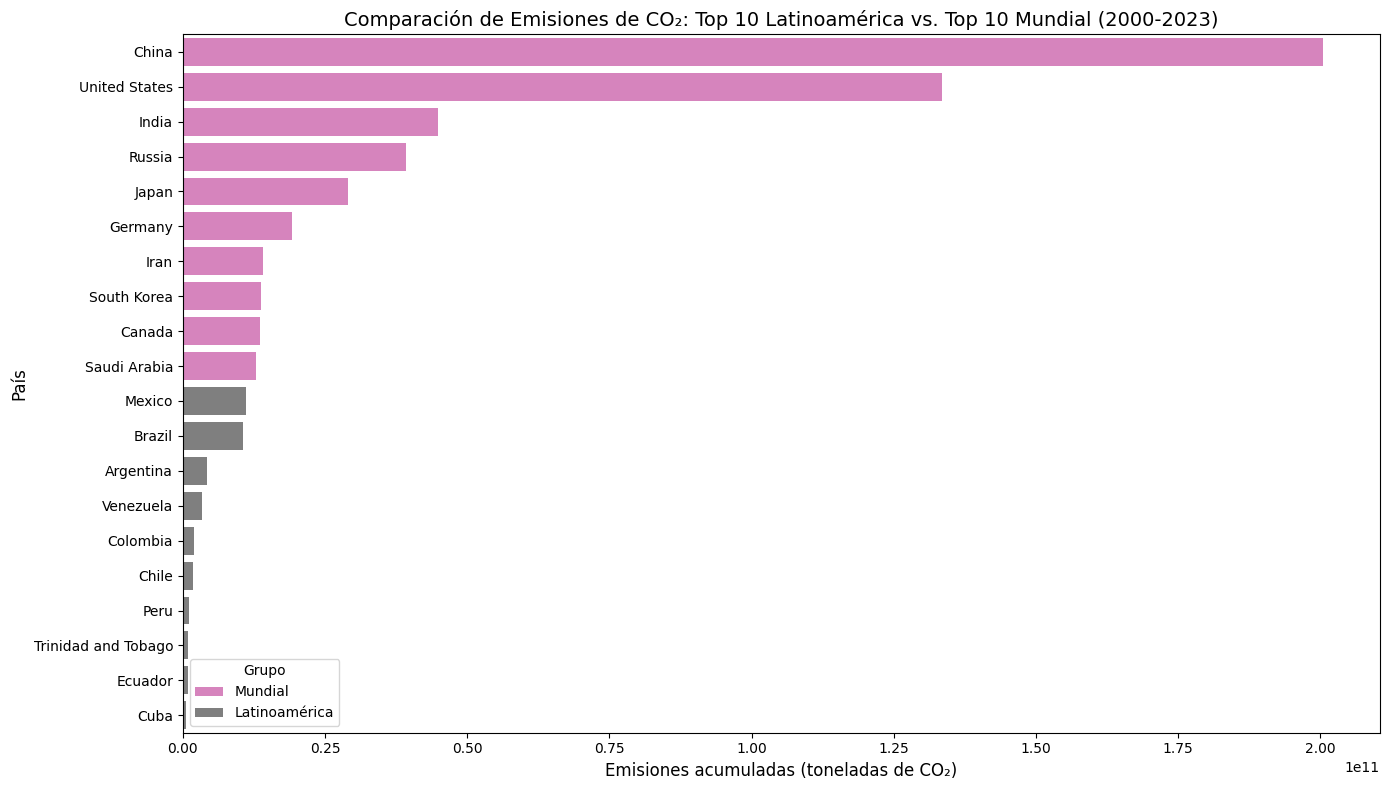

In [19]:
# 1. Filtrar el DataFrame para el periodo 2000-2023
df_periodo = df_paises[(df_paises['Year'] >= 2000) & (df_paises['Year'] <= 2023)].copy()

# 2. Calcular las emisiones acumuladas por país en este periodo
emisiones_acumuladas = df_periodo.groupby('Entity')['Annual CO₂ emissions'].sum()

# 3. Identificar el Top 10 mundial (intentando excluir regiones/continentes)
# **Este es el bloque modificado**
palabras_a_excluir = ['World', 'Asia', 'High-income countries','Upper-middle-income countries', 'Lower-middle-income countries' , 'International shipping','Europe', 'Africa', 'North America', 'South America', 'EU-28', 'G20', 'OECD', 'GCP']
emisiones_paises = emisiones_acumuladas[~emisiones_acumuladas.index.str.contains('|'.join(palabras_a_excluir), na=False)]
top_10_mundial = emisiones_paises.nlargest(10)

# 4. Identificar el Top 10 latinoamericano
paises_latinoamericanos = [
    "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Costa Rica",
    "Cuba", "Dominican Republic", "Ecuador", "El Salvador", "Guatemala",
    "Haiti", "Honduras", "Mexico", "Nicaragua", "Panama", "Paraguay",
    "Peru", "Puerto Rico", "Uruguay", "Venezuela", "Trinidad and Tobago"
]
emisiones_la = emisiones_acumuladas[emisiones_acumuladas.index.isin(paises_latinoamericanos)]
top_10_la = emisiones_la.nlargest(10)

# 5. Crear un DataFrame combinado para graficar
df_top_mundial = top_10_mundial.reset_index()
df_top_mundial.columns = ['País', 'Emisiones']
df_top_mundial['Grupo'] = 'Mundial'

df_top_la = top_10_la.reset_index()
df_top_la.columns = ['País', 'Emisiones']
df_top_la['Grupo'] = 'Latinoamérica'

df_comparacion = pd.concat([df_top_mundial, df_top_la]).sort_values(by='Emisiones', ascending=False)

# 6. Crear el gráfico de barras horizontal
plt.figure(figsize=(14, 8))
sns.barplot(y='País', x='Emisiones', hue='Grupo', data=df_comparacion, palette={'Mundial': '#e377c2', 'Latinoamérica': '#7f7f7f'}) # Elige tus colores
plt.xlabel("Emisiones acumuladas (toneladas de CO₂)", fontsize=12)
plt.ylabel("País", fontsize=12)
plt.title("Comparación de Emisiones de CO₂: Top 10 Latinoamérica vs. Top 10 Mundial (2000-2023)", fontsize=14)
plt.legend(title='Grupo')
plt.tight_layout()
plt.show()

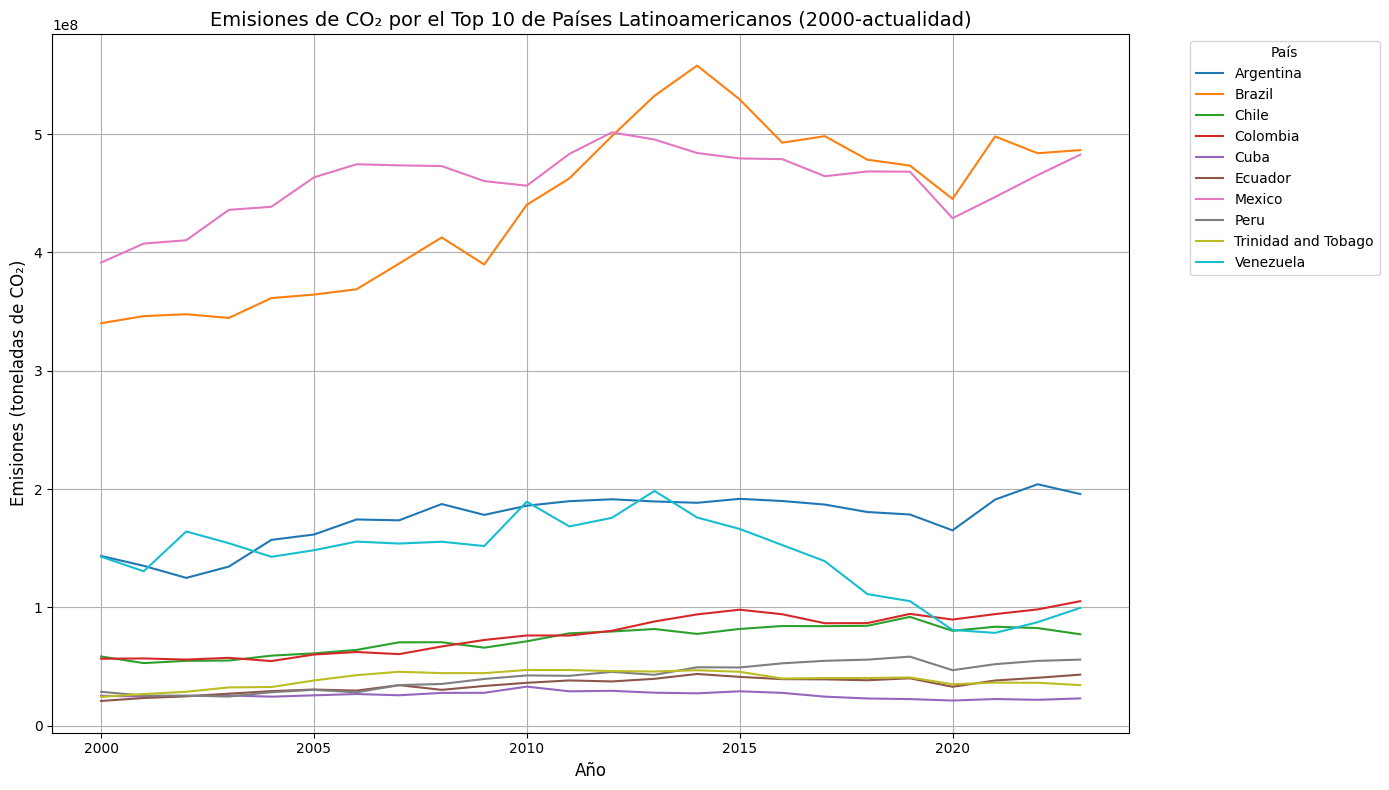

In [20]:
# Asumiendo que df_paises ya está filtrado desde el año 2000

paises_latinoamericanos = [
    "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Costa Rica",
    "Cuba", "Dominican Republic", "Ecuador", "El Salvador", "Guatemala",
    "Haiti", "Honduras", "Mexico", "Nicaragua", "Panama", "Paraguay",
    "Peru", "Puerto Rico", "Uruguay", "Venezuela", "Trinidad and Tobago"
]

# Filtrar df_paises para obtener solo los países latinoamericanos
df_latinoamerica = df_paises[df_paises['Entity'].isin(paises_latinoamericanos)].copy()

# Calcular las emisiones totales acumuladas SOLO para los países latinoamericanos
emisiones_totales_la = df_latinoamerica.groupby('Entity')['Annual CO₂ emissions'].sum().sort_values(ascending=False)

# Obtener el Top 10 de países latinoamericanos por emisiones acumuladas
top_10_paises_la = emisiones_totales_la.head(10).index.tolist()

# Filtrar el DataFrame original (filtrado desde 2000) para incluir solo el Top 10 latinoamericano
df_top_10_la = df_paises[df_paises['Entity'].isin(top_10_paises_la)].copy()

# Crear el gráfico de líneas
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_top_10_la, x='Year', y='Annual CO₂ emissions', hue='Entity')
plt.xlabel("Año", fontsize=12)
plt.ylabel("Emisiones (toneladas de CO₂)", fontsize=12)
plt.title("Emisiones de CO₂ por el Top 10 de Países Latinoamericanos (2000-actualidad)", fontsize=14)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
def graficar_emisiones_latinoamerica(df):
    # Lista de países de Latinoamérica (puedes agregar más si es necesario)
    paises_latinoamerica = [
        'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba',
        'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala', 'Honduras',
        'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela'
    ]

    # Filtrar datos desde el año 2000 y solo de los países latinoamericanos
    df_filtrado = df[
        (df['Entity'].isin(paises_latinoamerica)) &
        (df['Year'] >= 2000)
    ]

    # Agrupar por año y sumar las emisiones, luego convertir a gigatoneladas
    emisiones_latam = df_filtrado.groupby("Year")["Annual CO₂ emissions"].sum() / 1e9

    # Graficar
    plt.figure(figsize=(12, 6))
    plt.plot(emisiones_latam.index, emisiones_latam.values, marker='o', color='green')
    plt.title("Emisiones de CO₂ en Latinoamérica (2000–2023)")
    plt.xlabel("Año")
    plt.ylabel("Emisiones (gigatoneladas)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

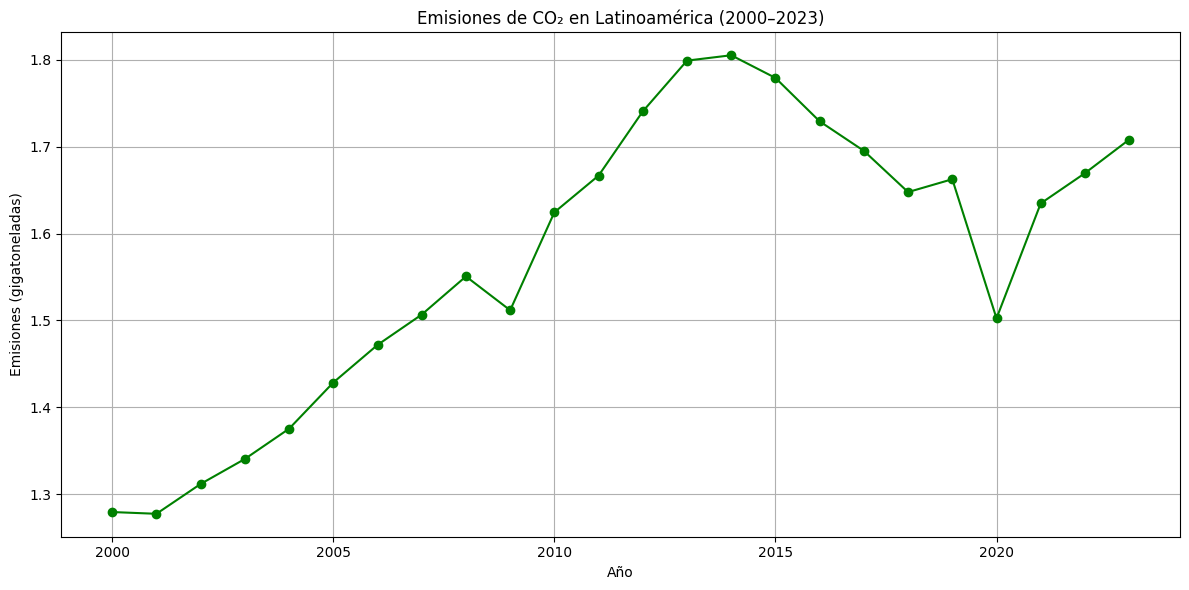

In [22]:
graficar_emisiones_latinoamerica(df_paises)

In [23]:
import plotly.express as px

# Lista de países latinoamericanos
paises_latinoamerica = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba',
    'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala', 'Honduras',
    'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela'
]

# Filtrar datos desde el año 2000 en adelante para países latinoamericanos
df_mapa = df_paises[(df_paises["Entity"].isin(paises_latinoamerica)) & (df_paises["Year"] >= 2000)].copy()

# Convertir emisiones a gigatoneladas
df_mapa["Emisiones GT"] = df_mapa["Annual CO₂ emissions"] / 1e9

# Crear categorías de emisiones por rangos
bins = [0, 0.1, 0.5, 1, 2, 5, 10, 20]
labels = ["<0.1", "0.1–0.5", "0.5–1", "1–2", "2–5", "5–10", ">10"]
df_mapa["Rango de emisiones (GT)"] = pd.cut(df_mapa["Emisiones GT"], bins=bins, labels=labels)

# Crear mapa animado
fig = px.choropleth(
    df_mapa,
    locations="Code",
    color="Rango de emisiones (GT)",
    hover_name="Entity",
    animation_frame="Year",
    title="🌎 Emisiones de CO₂ en Latinoamérica (2000–actualidad, animado por año)",
    template="plotly_white",
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.update_layout(
    title_font_size=22,
    geo=dict(showframe=False, showcoastlines=True, projection_type="natural earth")
)

fig.show()


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel, wilcoxon
from math import sqrt

# Definir países y año de política de mitigación
politicas = {
    "Brazil": 2016,
    "Mexico": 2020,
    "Argentina": 2020,

}

# DataFrame filtrado por países importantes
df_filtrado = df_paises[df_paises["Entity"].isin(politicas.keys()) & (df_paises["Year"] >= 2000)].copy()

resultados = []

for pais, anio_mitigacion in politicas.items():
    df_pais = df_filtrado[df_filtrado["Entity"] == pais]

    antes = df_pais[(df_pais["Year"] >= anio_mitigacion - 5) & (df_pais["Year"] < anio_mitigacion)]
    despues = df_pais[(df_pais["Year"] >= anio_mitigacion) & (df_pais["Year"] < anio_mitigacion + 5)]

    min_len = min(len(antes), len(despues))
    if min_len < 3:
        print(f"{pais}: No hay suficientes datos para el análisis.")
        continue

    antes = antes.tail(min_len)["Annual CO₂ emissions"].values
    despues = despues.head(min_len)["Annual CO₂ emissions"].values

    # Prueba t
    t_stat, p_t = ttest_rel(antes, despues)

    # Wilcoxon
    try:
        w_stat, p_w = wilcoxon(antes, despues)
    except:
        p_w = np.nan

    # Cambio porcentual promedio
    cambio_pct = np.mean((despues - antes) / antes) * 100

    # Tamaño del efecto (Cohen's d)
    diff = despues - antes
    cohen_d = diff.mean() / diff.std(ddof=1)

    resultados.append({
        "País": pais,
        "Año mitigación": anio_mitigacion,
        "p (t-test)": p_t,
        "p (Wilcoxon)": p_w,
        "Cambio promedio (%)": cambio_pct,
        "Cohen's d": cohen_d
    })


In [25]:
df_resultados = pd.DataFrame(resultados)
print(df_resultados.round(3))


        País  Año mitigación  p (t-test)  p (Wilcoxon)  Cambio promedio (%)  \
0     Brazil            2016       0.170         0.188               -6.936   
1     Mexico            2020       0.379         0.375               -2.947   
2  Argentina            2020       0.670         0.875                2.972   

   Cohen's d  
0     -0.747  
1     -0.515  
2      0.235  


Interpretación
Si el valor p < 0.05, entonces hay evidencia estadística de un cambio en las emisiones tras la implementación de políticas.

Compara los resultados de la prueba t (paramétrica) y Wilcoxon (no paramétrica) para mayor robustez.

Si no se observa diferencia significativa, puede indicar que las políticas aún no tienen impacto medible o que el efecto es más largo plazo.

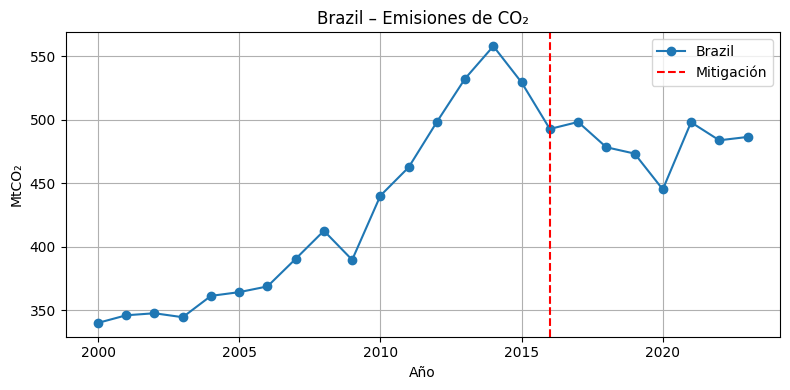

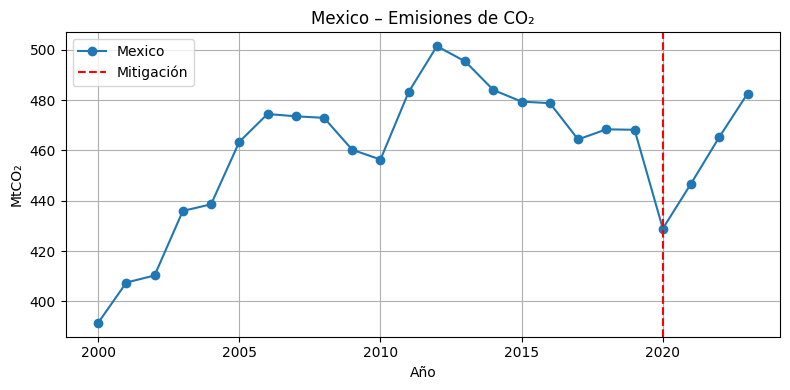

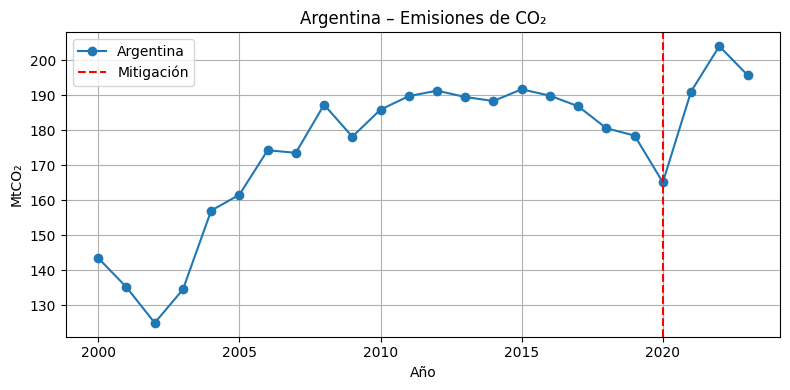

In [26]:
for pais, anio_mitigacion in politicas.items():
    df_pais = df_filtrado[df_filtrado["Entity"] == pais]

    plt.figure(figsize=(8, 4))
    plt.plot(df_pais["Year"], df_pais["Annual CO₂ emissions"] / 1e6, marker='o', label=pais)
    plt.axvline(anio_mitigacion, color='red', linestyle='--', label="Mitigación")
    plt.title(f"{pais} – Emisiones de CO₂")
    plt.xlabel("Año")
    plt.ylabel("MtCO₂")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


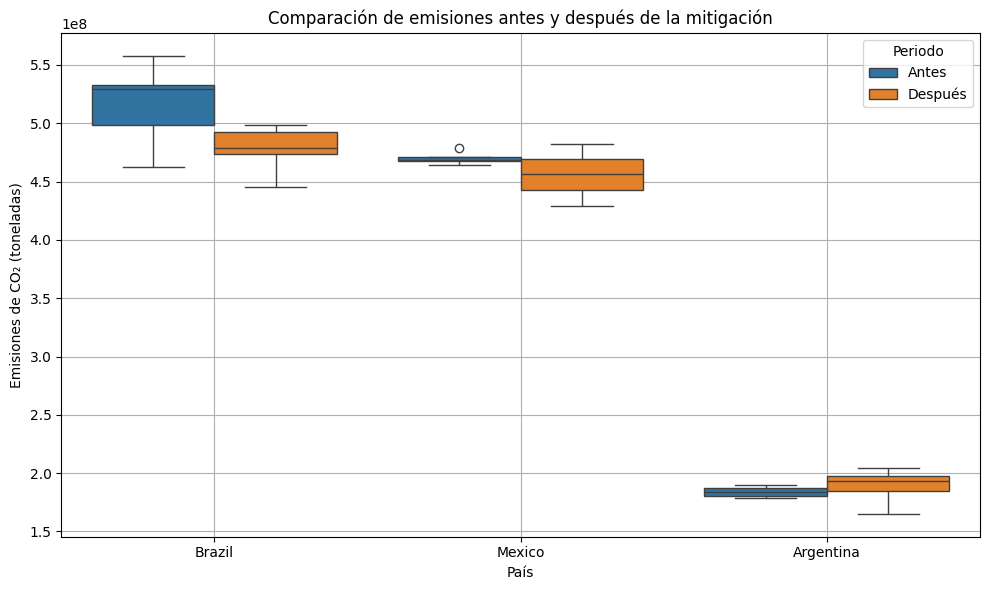

In [27]:
datos_box = []

for pais, anio_mitigacion in politicas.items():
    df_pais = df_filtrado[df_filtrado["Entity"] == pais]
    antes = df_pais[(df_pais["Year"] >= anio_mitigacion - 5) & (df_pais["Year"] < anio_mitigacion)]
    despues = df_pais[(df_pais["Year"] >= anio_mitigacion) & (df_pais["Year"] < anio_mitigacion + 5)]

    min_len = min(len(antes), len(despues))
    if min_len < 3:
        continue

    antes = antes.tail(min_len)
    despues = despues.head(min_len)

    datos_box.extend([
        {"País": pais, "Periodo": "Antes", "Emisiones": x} for x in antes["Annual CO₂ emissions"]
    ])
    datos_box.extend([
        {"País": pais, "Periodo": "Después", "Emisiones": x} for x in despues["Annual CO₂ emissions"]
    ])

df_box = pd.DataFrame(datos_box)

plt.figure(figsize=(10, 6))
sns.boxplot(x="País", y="Emisiones", hue="Periodo", data=df_box)
plt.title("Comparación de emisiones antes y después de la mitigación")
plt.ylabel("Emisiones de CO₂ (toneladas)")
plt.grid(True)
plt.tight_layout()
plt.show()


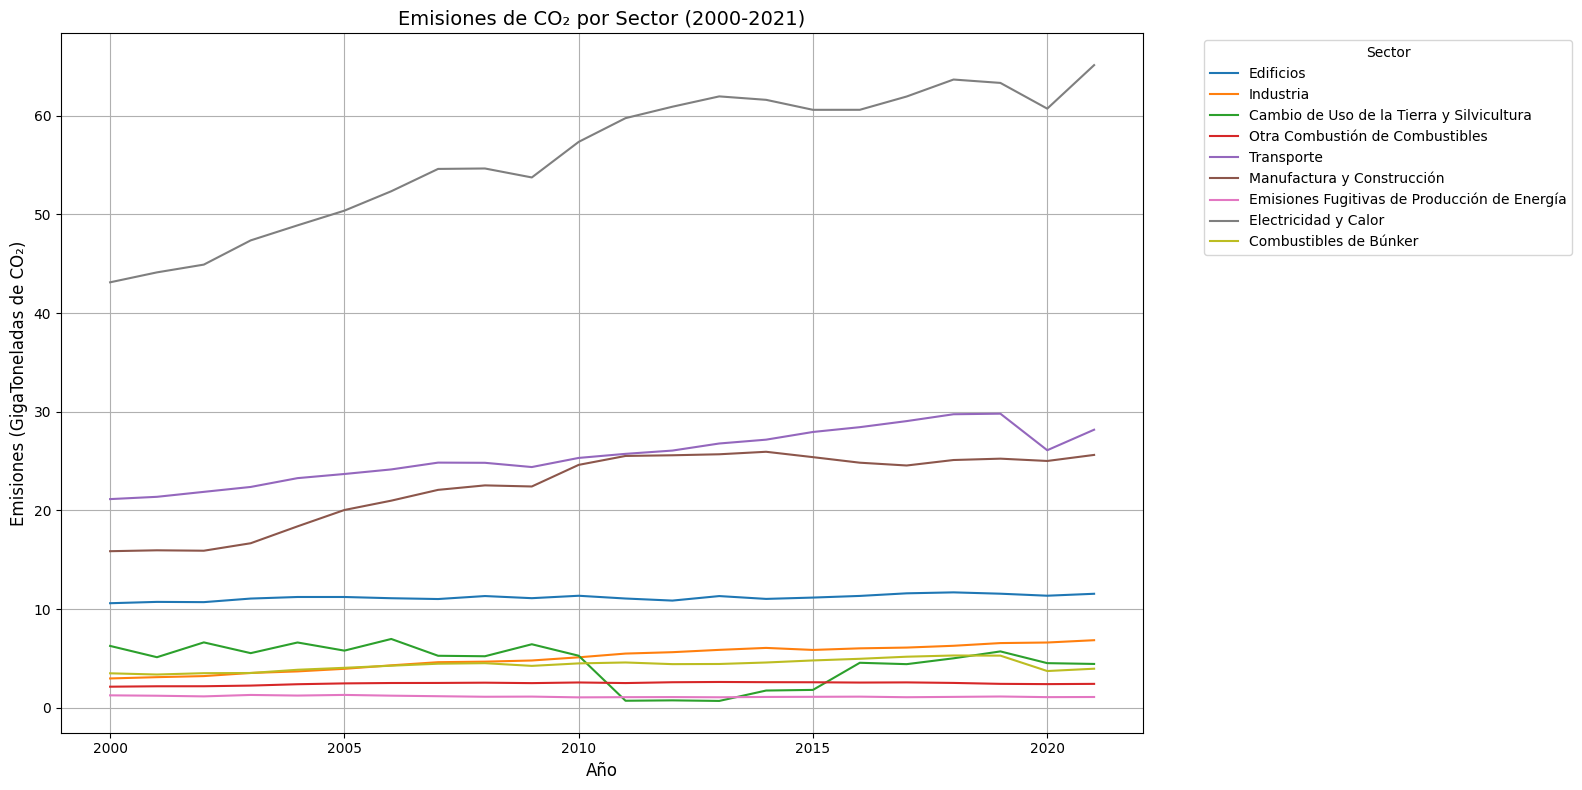

In [28]:
df_sector_filtrado = df_sector[(df_sector['Year'] >= 2000) & (df_sector['Year'] <= 2021)].copy()

columnas_emisiones = [
    'Entity', 'Year',
    'Carbon dioxide emissions from buildings',
    'Carbon dioxide emissions from industry',
    'Carbon dioxide emissions from land use change and forestry',
    'Carbon dioxide emissions from other fuel combustion',
    'Carbon dioxide emissions from transport',
    'Carbon dioxide emissions from manufacturing and construction',
    'Fugitive emissions of carbon dioxide from energy production',
    'Carbon dioxide emissions from electricity and heat',
    'Carbon dioxide emissions from bunker fuels'
]

df_emisiones_periodo = df_sector_filtrado[columnas_emisiones].copy()

df_emisiones_anuales = df_emisiones_periodo.groupby('Year').sum(numeric_only=True).reset_index()

columnas_gt = df_emisiones_anuales.columns[1:] # Excluimos la columna 'Year'
df_emisiones_anuales[columnas_gt] = df_emisiones_anuales[columnas_gt] / 1e9

plt.figure(figsize=(16, 8))
sns.lineplot(data=df_emisiones_anuales, x='Year', y='Carbon dioxide emissions from buildings', label='Edificios')
sns.lineplot(data=df_emisiones_anuales, x='Year', y='Carbon dioxide emissions from industry', label='Industria')
sns.lineplot(data=df_emisiones_anuales, x='Year', y='Carbon dioxide emissions from land use change and forestry', label='Cambio de Uso de la Tierra y Silvicultura')
sns.lineplot(data=df_emisiones_anuales, x='Year', y='Carbon dioxide emissions from other fuel combustion', label='Otra Combustión de Combustibles')
sns.lineplot(data=df_emisiones_anuales, x='Year', y='Carbon dioxide emissions from transport', label='Transporte')
sns.lineplot(data=df_emisiones_anuales, x='Year', y='Carbon dioxide emissions from manufacturing and construction', label='Manufactura y Construcción')
sns.lineplot(data=df_emisiones_anuales, x='Year', y='Fugitive emissions of carbon dioxide from energy production', label='Emisiones Fugitivas de Producción de Energía')
sns.lineplot(data=df_emisiones_anuales, x='Year', y='Carbon dioxide emissions from electricity and heat', label='Electricidad y Calor')
sns.lineplot(data=df_emisiones_anuales, x='Year', y='Carbon dioxide emissions from bunker fuels', label='Combustibles de Búnker')

plt.xlabel("Año", fontsize=12)
plt.ylabel("Emisiones (GigaToneladas de CO₂)", fontsize=12)
plt.title("Emisiones de CO₂ por Sector (2000-2021)", fontsize=14)
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Correlación emisiones por sectores**

In [29]:
# Seleccionar solo las columnas de emisiones de los diferentes sectores
columnas_emisiones = [
    'Carbon dioxide emissions from buildings',
    'Carbon dioxide emissions from industry',
    'Carbon dioxide emissions from land use change and forestry',
    'Carbon dioxide emissions from other fuel combustion',
    'Carbon dioxide emissions from transport',
    'Carbon dioxide emissions from manufacturing and construction',
    'Fugitive emissions of carbon dioxide from energy production',
    'Carbon dioxide emissions from electricity and heat',
    'Carbon dioxide emissions from bunker fuels'
]

df_emisiones_sectores = df_sector[columnas_emisiones]

# Calcular la matriz de correlación
matriz_correlacion = df_emisiones_sectores.corr(numeric_only=True)

# Mostrar la matriz de correlación
print("Matriz de Correlación entre Emisiones por Sector:")
print(matriz_correlacion)

Matriz de Correlación entre Emisiones por Sector:
                                                    Carbon dioxide emissions from buildings  \
Carbon dioxide emissions from buildings                                            1.000000   
Carbon dioxide emissions from industry                                             0.827324   
Carbon dioxide emissions from land use change a...                                 0.060411   
Carbon dioxide emissions from other fuel combus...                                 0.940298   
Carbon dioxide emissions from transport                                            0.981537   
Carbon dioxide emissions from manufacturing and...                                 0.893952   
Fugitive emissions of carbon dioxide from energ...                                 0.898500   
Carbon dioxide emissions from electricity and heat                                 0.967905   
Carbon dioxide emissions from bunker fuels                                         0.962550   


Correlaciones Positivas Fuertes (valores cercanos a 1):

Edificios vs. Transporte (0.98): Existe una correlación muy fuerte entre las emisiones de edificios y las del transporte. Esto sugiere que cuando las emisiones del sector de la construcción y operación de edificios tienden a aumentar, las del sector del transporte también lo hacen, y viceversa. Podría haber factores comunes que influyen en ambos, como el crecimiento económico o la actividad urbana.
Edificios vs. Electricidad y Calor (0.97): Hay una correlación muy fuerte entre las emisiones de edificios y las de la generación de electricidad y calor. Esto es lógico, ya que los edificios son grandes consumidores de electricidad para iluminación, calefacción y refrigeración. Un aumento en el consumo energético de los edificios probablemente se refleje en una mayor demanda de electricidad y calor, lo que a su vez puede aumentar las emisiones de este sector (dependiendo de las fuentes de energía utilizadas).
Edificios vs. Combustión de Otros Combustibles (0.94): También hay una correlación fuerte con la combustión de otros combustibles (que podría incluir la quema directa de combustibles en edificios para calefacción, por ejemplo).
Industria vs. Manufactura y Construcción (0.99): La correlación entre las emisiones de la industria en general y las específicamente de la manufactura y la construcción es extremadamente fuerte. Esto es esperable, ya que la manufactura y la construcción son subsectores importantes dentro de la categoría más amplia de "industria".
Industria vs. Combustión de Otros Combustibles (0.95): Una correlación fuerte sugiere que la actividad industrial y la combustión de otros combustibles tienden a variar juntas.
Transporte vs. Electricidad y Calor (0.96) y vs. Combustión de Búnker (0.96): El transporte muestra una correlación fuerte con la generación de electricidad y calor, y también con el consumo de combustibles de búnker (utilizados en el transporte marítimo internacional). La correlación con electricidad podría deberse a la creciente electrificación del transporte en algunos sectores.
Electricidad y Calor vs. Combustión de Otros Combustibles (0.97) y vs. Manufactura y Construcción (0.97): La generación de electricidad y calor está fuertemente correlacionada con la combustión de otros combustibles (lo que podría indicar el uso de diversos combustibles para la generación) y con las emisiones de la manufactura y la construcción (que son grandes consumidores de energía).
Correlaciones Positivas Moderadas (valores alrededor de 0.7 - 0.9):

La mayoría de los otros pares de sectores muestran correlaciones positivas moderadas, lo que sugiere que, en general, las emisiones de los diferentes sectores tienden a moverse en la misma dirección, aunque la relación no sea tan lineal o fuerte como en los casos anteriores.
Correlaciones Débiles o Nulas (valores cercanos a 0):

Casi todas las correlaciones con "Cambio de Uso de la Tierra y Silvicultura" son muy débiles (cercanas a 0). Esto indica que las emisiones o absorciones de CO2 relacionadas con el cambio de uso de la tierra y la silvicultura tienen una dinámica muy diferente y no están fuertemente ligadas a las emisiones de los sectores de energía y transporte. La correlación más alta con este sector es con las emisiones fugitivas de la producción de energía (0.26), que aún es relativamente débil. La correlación con los combustibles de búnker es prácticamente cero (0.001).
En resumen:

Los sectores energéticos tradicionales (industria, electricidad y calor, manufactura y construcción, combustión de otros combustibles, producción de energía) tienden a estar fuertemente correlacionados entre sí, lo que sugiere que factores macroeconómicos o políticas energéticas generales pueden afectar a estos sectores de manera similar.
El sector del transporte también muestra fuertes correlaciones con los sectores energéticos y con los combustibles específicos de su uso (búnker).
Las emisiones relacionadas con el cambio de uso de la tierra y la silvicultura parecen ser independientes de las emisiones de los otros sectores, lo que refleja la naturaleza diferente de estas emisiones (a menudo ligadas a la deforestación, la reforestación y las prácticas agrícolas).
Esta interpretación te da una visión general de cómo se relacionan las emisiones entre los diferentes sectores en tu conjunto de datos. Puedes utilizar esta información para comprender mejor las dinámicas de las emisiones y para informar modelos o políticas climáticas.